<a href="https://colab.research.google.com/github/kayc0des/principal-component-analysis-summative/blob/main/Summative_Assignment_PCA_%5BKingsley_Budu_Boafo%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>
    <img src="https://miro.medium.com/v2/resize:fit:300/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg">
</center>



The goal of PCA is to extract information while reducing the number of features
from a dataset by identifying which existing features relate to another. The crux of the algorithm is trying to determine the relationship between existing features, called principal components, and then quantifying how relevant these principal components are. The principal components are used to transform the high dimensional data to a lower dimensional data while preserving as much information. For a principal component to be relevant, it needs to capture information about the features. We can determine the relationships between features using covariance.

In [38]:
#import necessary package

import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = np.array([
    [   1,   2,  -1,   4,  10],
    [   3,  -3,  -3,  12, -15],
    [   2,   1,  -2,   4,   5],
    [   5,   1,  -5,  10,   5],
    [   2,   3,  -3,   5,  12],
    [   4,   0,  -3,  16,   2],
])

### Step 1: Standardize the Data along the Features

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLxe5VYCBsaZddkkTZlCY24Yov4JJD4-ArTA&usqp=CAU)




Explain why we need to handle the data on the same scale.

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [4]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

standardized_data = (data - mean) / std

print(standardized_data)

[[-1.36438208  0.70710678  1.5109662  -0.99186978  0.77802924]
 [ 0.12403473 -1.94454365 -0.13736056  0.77145428 -2.06841919]
 [-0.62017367  0.1767767   0.68680282 -0.99186978  0.20873955]
 [ 1.61245155  0.1767767  -1.78568733  0.33062326  0.20873955]
 [-0.62017367  1.23743687 -0.13736056 -0.77145428  1.00574511]
 [ 0.86824314 -0.35355339 -0.13736056  1.65311631 -0.13283426]]


![cov matrix.webp](https://dmitry.ai/uploads/default/original/1X/9bd2851674ebb55e404cc3ff5e2ffe65b42ff460.png)

We use the pair - wise covariance of the different features to determine how they relate to each other. With these covariances, our goal is to group / cluster based on similar patterns. Intuitively, we can relate features if they have similar covariances with other features.

### Step 2: Calculate the Covariance Matrix



In [30]:
cov_matrix = np.cov(standardized_data, rowvar=False)

print(cov_matrix)

[[ 1.2        -0.42098785 -1.0835838   0.90219291 -0.37000528]
 [-0.42098785  1.2         0.20397003 -0.77149364  1.18751836]
 [-1.0835838   0.20397003  1.2        -0.59947269  0.22208218]
 [ 0.90219291 -0.77149364 -0.59947269  1.2        -0.70017993]
 [-0.37000528  1.18751836  0.22208218 -0.70017993  1.2       ]]


### Step 3: Eigendecomposition on the Covariance Matrix


In [32]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(eigenvectors)
print(eigenvalues)

[[-0.4640131   0.45182808 -0.70733581  0.28128049 -0.03317471]
 [ 0.45019005  0.48800851  0.29051532  0.6706731  -0.15803498]
 [ 0.37929082 -0.55665017 -0.48462321  0.24186072 -0.5029143 ]
 [-0.4976889   0.03162214  0.36999674 -0.03373724 -0.78311558]
 [ 0.43642295  0.49682965 -0.20861365 -0.64143906 -0.32822489]]
[3.80985761e+00 1.73655615e+00 4.94531029e-02 4.74189469e-05
 4.04085720e-01]


### Step 4: Sort the Principal Components
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

In [33]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]

print('\n\n sorted eigenvalues:\n{}'.format(sorted_eigenvalues))
sorted_eigenvectors = eigenvectors[:, order_of_importance]
print('\n\n The sorted eigenvectors matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [0 1 4 2 3]


 sorted eigen values:
[3.80985761e+00 1.73655615e+00 4.04085720e-01 4.94531029e-02
 4.74189469e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


Question:

1. Why do we order eigen values and eigen vectors?

It facilitates the identification of principal components by arranging eigenvalues in descending order of importance, enabling the selection of components that capture the most variance in the data. This ordering also aids in dimensionality reduction, as it allows for the retention of the most significant features while reducing the dataset's dimensionality.

2. Is it true we would consider the lowest eigen value compared to the highest? Defend your answer

No, typically, we are more interested in the eigenvalues corresponding to the largest magnitude, not the smallest. The reason for this lies in the interpretation of eigenvalues and their role in capturing variance in the data.

Eigenvalues represent the amount of variance explained by each principal component or eigenvector. Larger eigenvalues indicate that the corresponding principal components capture more variance in the dataset, making them more informative and significant for data analysis tasks. Therefore, the eigenvalues with the highest magnitudes are considered more important as they capture more variance and contribute more significantly to the overall structure of the data.


You want to see what percentage of information each eigen value holds. You would have print out the percentage of each eigen value using the formula



> (sorted eigen values / sum of all sorted eigen values) * 100



In [55]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors

explained_variance = (sorted_eigenvalues / np.sum(sorted_eigenvalues)) * 100

explained_variance_formatted = [f"{value:.2f}%" for value in explained_variance]
print(explained_variance_formatted)

['63.50%', '28.94%', '6.73%', '0.82%', '0.00%']


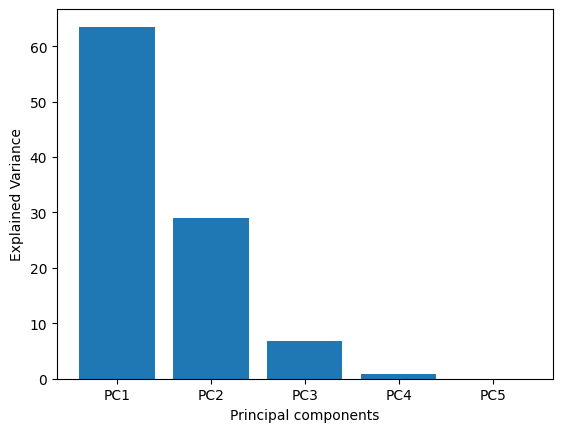

In [62]:
names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
value = values = [float(i[:-1]) for i in explained_variance_formatted]
plt.bar(names, value)
plt.ylabel('Explained Variance')
plt.xlabel('Principal components')
plt.show()

#Initialize the number of Principle components then perfrom matrix multiplication with the variable K example k = 3 for 3 priciple components




> The reulting matrix (with reduced data) = standardized data * vector with columns k

See expected output for k = 2



In [63]:
# Select the top k=2 eigenvectors
top_k_eigenvectors = sorted_eigenvectors[:, :2]

# Project the data onto the top k=2 eigenvectors
reduced_data = np.dot(standardized_data, top_k_eigenvectors)

In [64]:
print(reduced_data)

[[ 2.3577116  -0.75728867]
 [-2.27171739 -1.81970663]
 [ 1.21259114 -0.50390931]
 [-1.41935914  1.9229856 ]
 [ 1.61562536  0.87541857]
 [-1.49485157  0.28250044]]


In [65]:
print(reduced_data.shape)

(6, 2)


# *What are 2 positive effects and 2 negative effects of PCA

Give 2 Benefits and 2 limitations
Positive Effects:

- PCA helps reduce the dimensionality of high-dimensional data while retaining most of its variance. By representing data in a lower-dimensional space, it becomes easier to visualize, analyze, and interpret.

- PCA can effectively remove noise and irrelevant features from the data. Since principal components are orthogonal to each other, they capture different aspects of the data, allowing PCA to focus on the most significant variations and discard noise.

Negative Effects:

- While PCA reduces the dimensionality of the data, it often comes at the cost of interpretability. The principal components generated by PCA are linear combinations of the original features, making it challenging to interpret them in terms of the original variables.

- PCA may lead to some loss of information, especially when reducing the dimensionality significantly. While PCA retains most of the variance in the data, it may not preserve all the details, leading to a loss of information that may be relevant for certain applications. It's essential to balance dimensionality reduction with the amount of information retained.